In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import rainbow
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

c:\users\kartik mishra\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("dataset.csv")


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
import seaborn as sns

In [8]:
corrmat = df.corr()

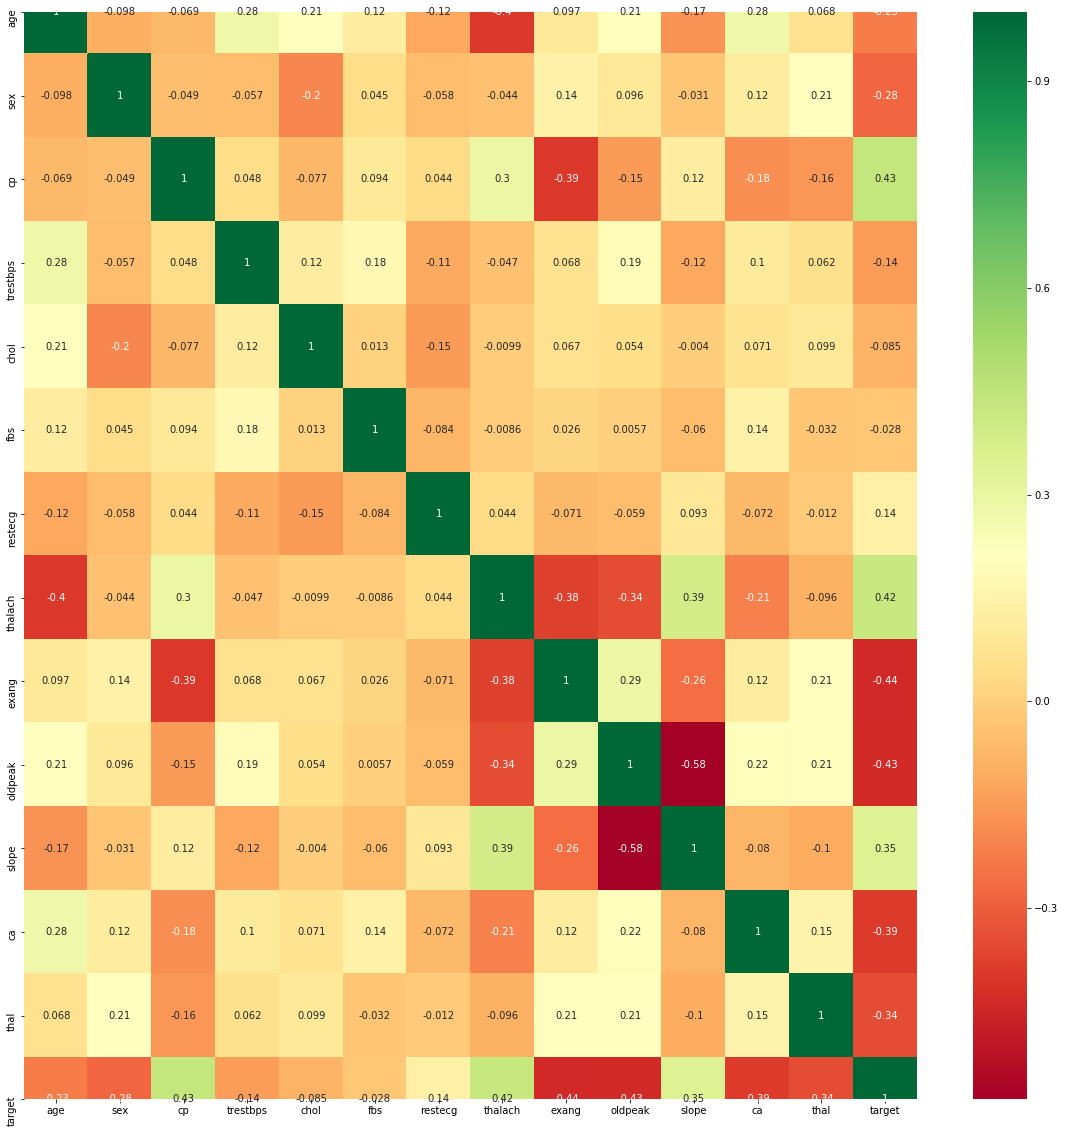

In [13]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002974BCB1E88>,
      dtype=object)

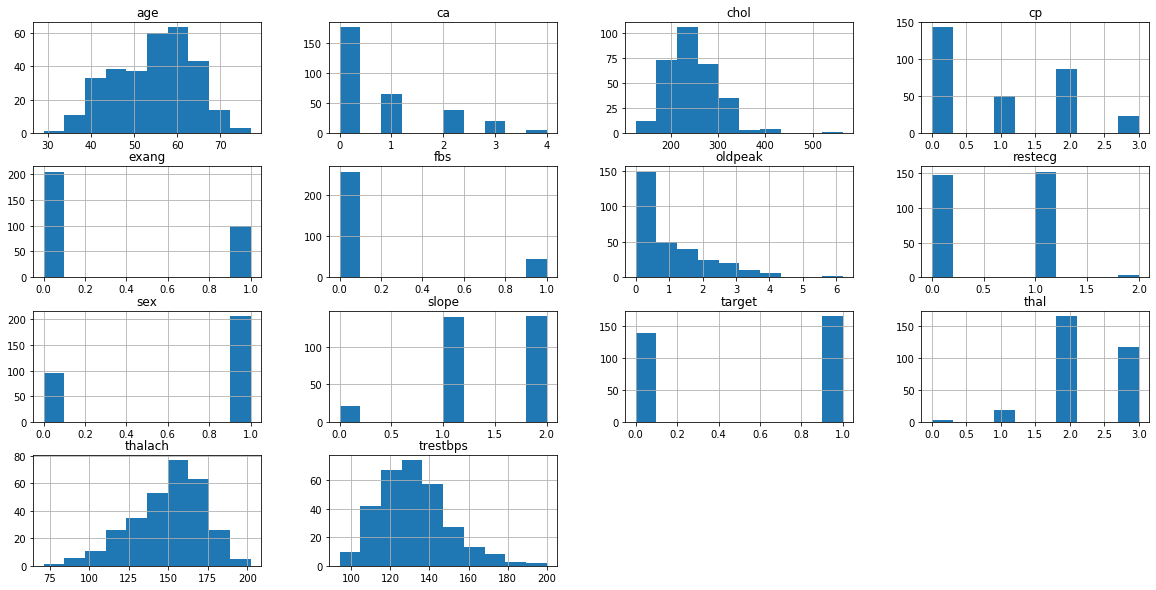

In [19]:


df.hist(figsize=(20,10))


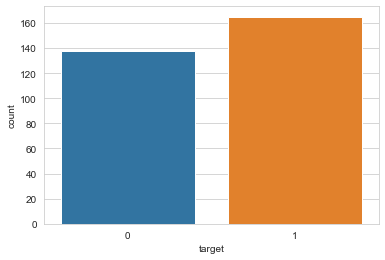

In [20]:
sns.set_style("whitegrid")
sns.countplot(data=df,x="target")

In [21]:
dataset = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
columns_to_scale=["age",'trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale] = standardscaler.fit_transform(dataset[columns_to_scale])

In [26]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [27]:
y = dataset["target"]
X = dataset.drop(["target"],axis=1)

In [28]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for i in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())
    

Text(0.5, 1.0, 'knn score for different k values')

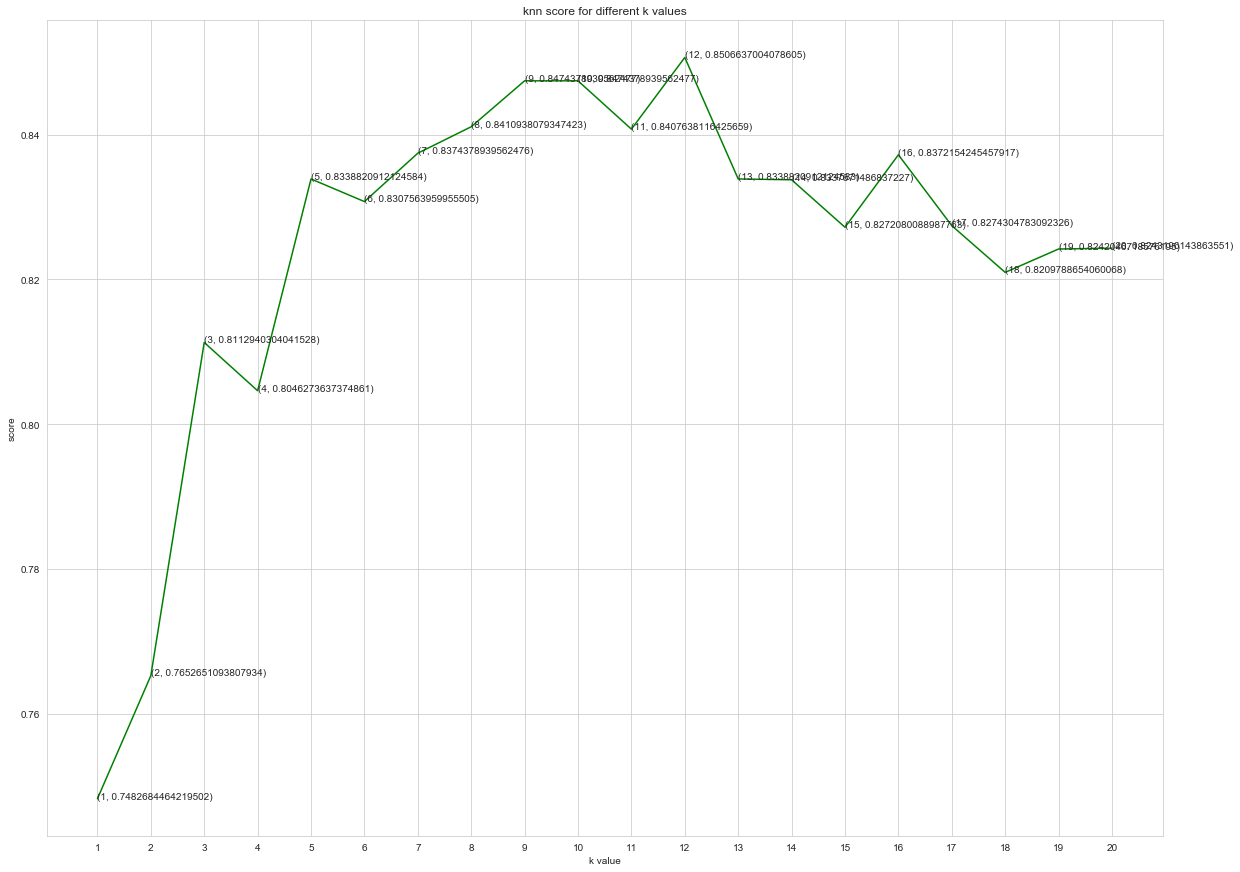

In [35]:
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1,21)],knn_scores,color='green')
for i in range(1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel("k value")
plt.ylabel("score")
plt.title("knn score for different k values")

# best k value is 12

In [41]:

knn_classifier=KNeighborsClassifier(n_neighbors=12)
score = cross_val_score(knn_classifier,X,y,cv=10)


In [42]:
score.mean()

0.8506637004078605

# random forest

In [55]:
randomforest = RandomForestClassifier(n_estimators=15)


In [56]:
score = cross_val_score(randomforest,X,y,cv=10)

In [57]:
score.mean()

0.8017389692250649

# Decision Tree  

In [61]:
decisiontree = DecisionTreeClassifier(criterion="entropy")
score = cross_val_score(decisiontree,X,y,cv=10)
score.mean()

0.757500926955877